In [1]:
import pandas as pd

# Load the dataset
file_path = 'Final_Reddit_Posts.xlsx'
reddit_data = pd.read_excel(file_path)
reddit_data.head()

,Username,Post_Date,PostTitle,PostTitle_Wordcount,Mentions Cannabis,Use of Personal Pronouns,Mention of Personal Experience,Outcomes of cannabis consumption mentioned,Full_Post,PostURL,...,Reason for Quitting Cannabis,Outcomes of Quitting Cannabis,Frequency of Consumption,Quitting Strategy,Plans on Quitting,Experience While Quitting,Gender,Age_Group,Unnamed: 29,Unnamed: 30
0,u/PrimeTimeY2C,2021-01-02,Before you smoke...,3,No,No,No,No,"Before you smoke, make sure you brushed your t...",https://www.reddit.com/r/Petioles/comments/kpa...,...,"Quitting due to the Impact on work, school, or...",Effective reduction in consumption by maintain...,Frequency of consumption not mentioned,No specific plan mentioned about Quitting,No specific plan mentioned about Quitting,Experiencing improved physical health like bet...,Male,Adult,NaN,NaN
1,u/throwawayy875,2020-10-22,Flushed xans down the toilet. Still 8 months c...,9,No,No,No,No,"I know this is a weed moderation sub, but shit...",https://www.reddit.com/r/Petioles/comments/jge...,...,Quitting due to the concerns about physical an...,Temporary cessation followed by periods of use,Consumption of cannabis few times a week or on...,No specific plan mentioned about Quitting,Planning to seek assistance from family and fr...,Experiencing emotional changes like mood swing...,Unknown,Adult,NaN,NaN
2,u/conuigbo,2019-12-01,Grounded: An App to Help Track T-Breaks and Mo...,11,Yes,No,No,Yes,"Hi everyone, I‚Äôve created an app called ‚ÄúG...",https://www.reddit.com/r/Petioles/comments/e4n...,...,Quitting due to the concerns about physical an...,Complete cessation or stopping the use of cann...,Daily consumption of cannabis,No specific plan mentioned about Quitting,Planning to seek assistance from family and fr...,Experiencing physical withdrawal symptopms lik...,Unknown,Adult,NaN,NaN
3,u/allmycrazypostshere,2022-03-27,When I‚Äôm stoned I want to be sober. By the e...,20,No,Yes,No,No,I don‚Äôt think my life is THAT much better wh...,https://www.reddit.com/r/Petioles/comments/tps...,...,Quitting due to the concerns about physical an...,No outcome mentioned,Daily consumption of cannabis,No specific plan mentioned about Quitting,No specific plan mentioned about Quitting,Experiencing emotional changes like mood swing...,Unknown,Adult,NaN,NaN
4,u/hugelung,2021-08-21,Just a reminder: if your only addiction is smo...,37,No,Yes,No,No,Addiction is a core function of humans - we ar...,https://www.reddit.com/r/Petioles/comments/p8y...,...,Quitting due to the concerns about physical an...,Effective reduction in consumption by maintain...,Daily consumption of cannabis,Planning to quit Gradually,No specific plan mentioned about Quitting,Experiencing improved mental health like enhac...,Unknown,Adult,NaN,NaN


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


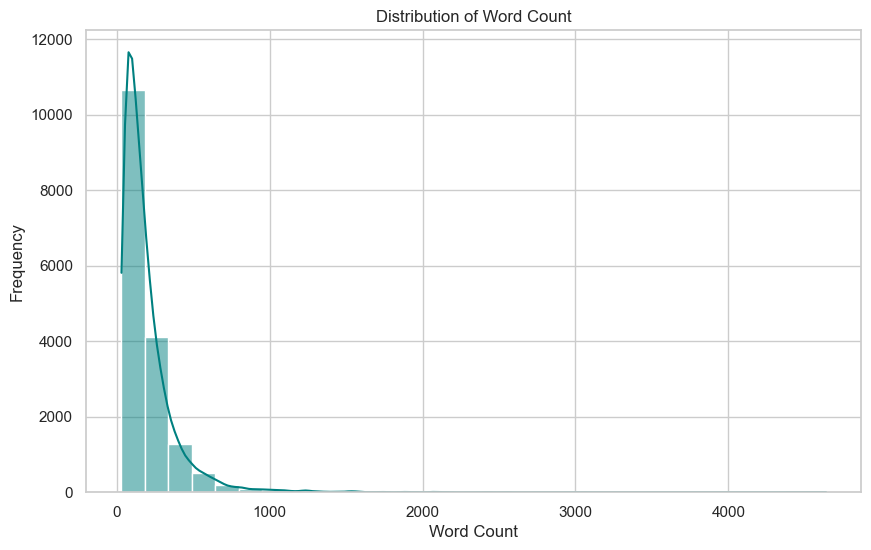

In [12]:
# Plotting Word Count Distribution with new color on an individual graph
plt.figure(figsize=(10, 6))
sns.histplot(reddit_data['WordCount'], bins=30, kde=True, color='teal')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


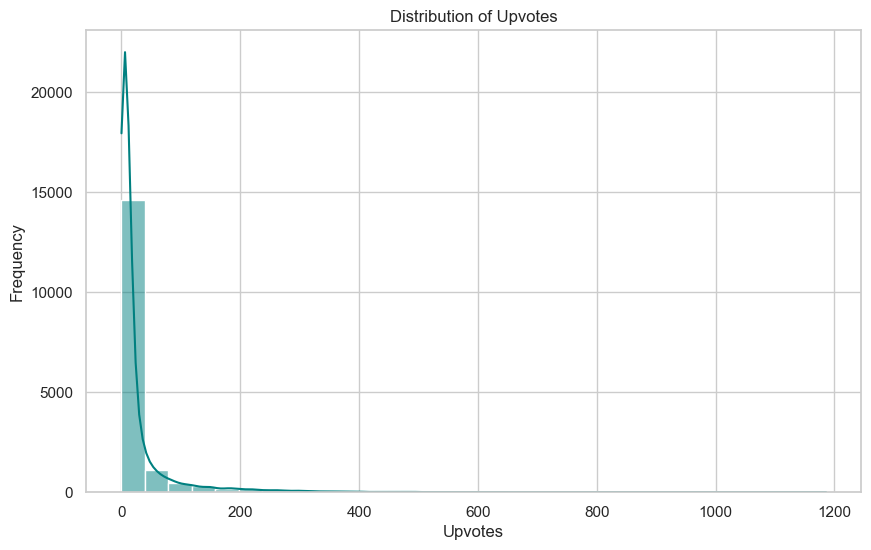

In [13]:
# Plotting Upvotes Distribution with new color on an individual graph
plt.figure(figsize=(10, 6))
sns.histplot(reddit_data['Upvotes'], bins=30, kde=True, color='teal')
plt.title('Distribution of Upvotes')
plt.xlabel('Upvotes')
plt.ylabel('Frequency')
plt.show()


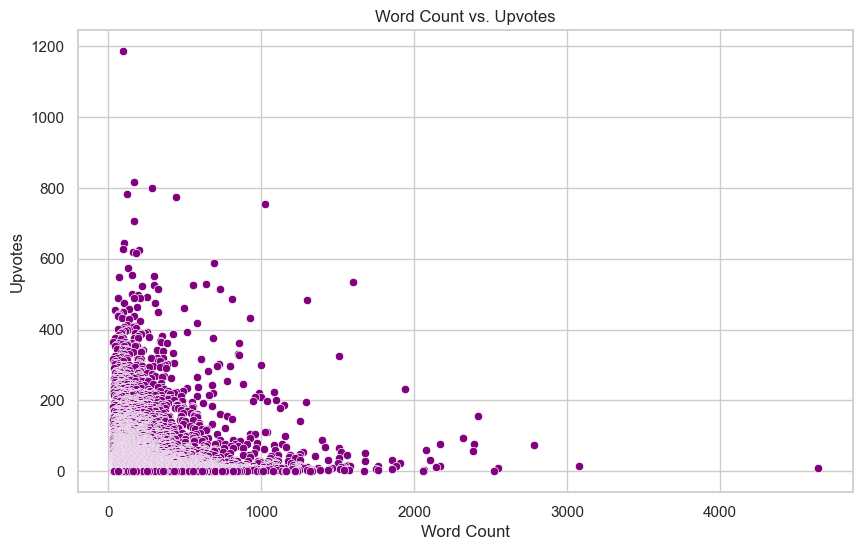

In [14]:
# Plotting Scatter Plot of Word Count vs Upvotes on an individual graph
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reddit_data, x='WordCount', y='Upvotes', color='purple')
plt.title('Word Count vs. Upvotes')
plt.xlabel('Word Count')
plt.ylabel('Upvotes')
plt.show()


In [15]:
# Calculate the correlation between "Upvotes" and "WordCount"
correlation = reddit_data['Upvotes'].corr(reddit_data['WordCount'])

correlation


0.0641758324907588

In [16]:
import statsmodels.api as sm

# Prepare the data for regression analysis
X = sm.add_constant(reddit_data['WordCount'])  # Adding a constant for the intercept
y = reddit_data['Upvotes']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
regression_summary = model.summary()
regression_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Upvotes   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     70.34
Date:                Mon, 06 May 2024   Prob (F-statistic):           5.38e-17
Time:                        02:04:26   Log-Likelihood:                -92774.
No. Observations:               17010   AIC:                         1.856e+05
Df Residuals:                   17008   BIC:                         1.856e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.8169      0.623     35.015      0.000      20.596      23.038
WordCount      0.0192      0.002      8.387      0.000       0.015       0.024
==============================================================================
Omnibus:                    17985.742   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1416985.211
Skew:                           5.335   Prob(JB):                         0.00
Kurtosis:                      46.422   Cond. No.                         391.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Calculate the Pearson correlation coefficients for sentiment scores with Upvotes and WordCount
correlation_sentiment_upvotes = reddit_data['Vader_Score_Compound'].corr(reddit_data['Upvotes'])
correlation_sentiment_wordcount = reddit_data['Vader_Score_Compound'].corr(reddit_data['WordCount'])

correlation_sentiment_upvotes, correlation_sentiment_wordcount


(0.05730902246070916, 0.09161279235272005)

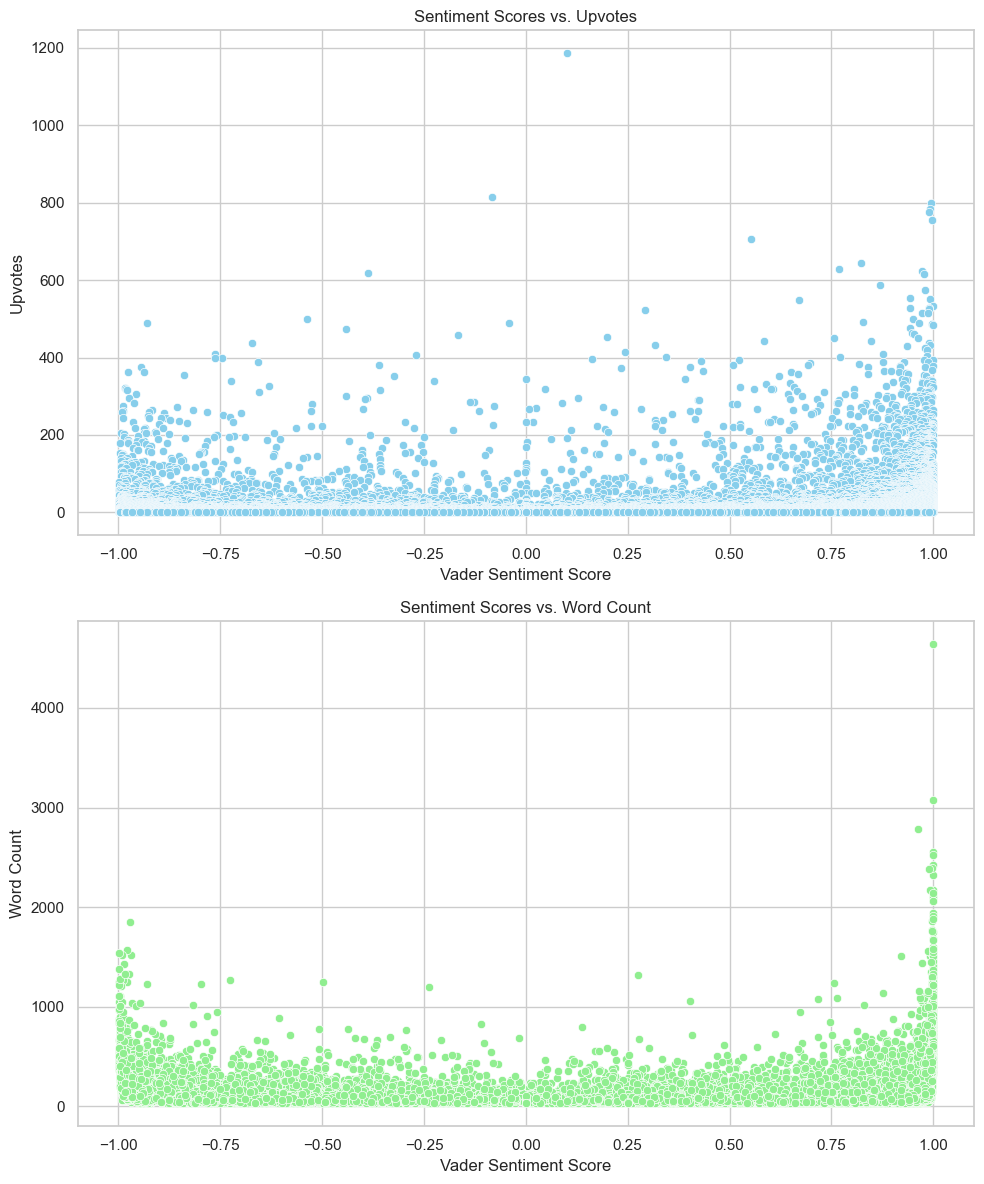

In [18]:
# Set up the plots for sentiment analysis visualizations
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Scatter plot for Sentiment Scores vs. Upvotes
sns.scatterplot(data=reddit_data, x='Vader_Score_Compound', y='Upvotes', ax=axes[0], color='skyblue')
axes[0].set_title('Sentiment Scores vs. Upvotes')
axes[0].set_xlabel('Vader Sentiment Score')
axes[0].set_ylabel('Upvotes')

# Scatter plot for Sentiment Scores vs. Word Count
sns.scatterplot(data=reddit_data, x='Vader_Score_Compound', y='WordCount', ax=axes[1], color='lightgreen')
axes[1].set_title('Sentiment Scores vs. Word Count')
axes[1].set_xlabel('Vader Sentiment Score')
axes[1].set_ylabel('Word Count')

plt.tight_layout()
plt.show()


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

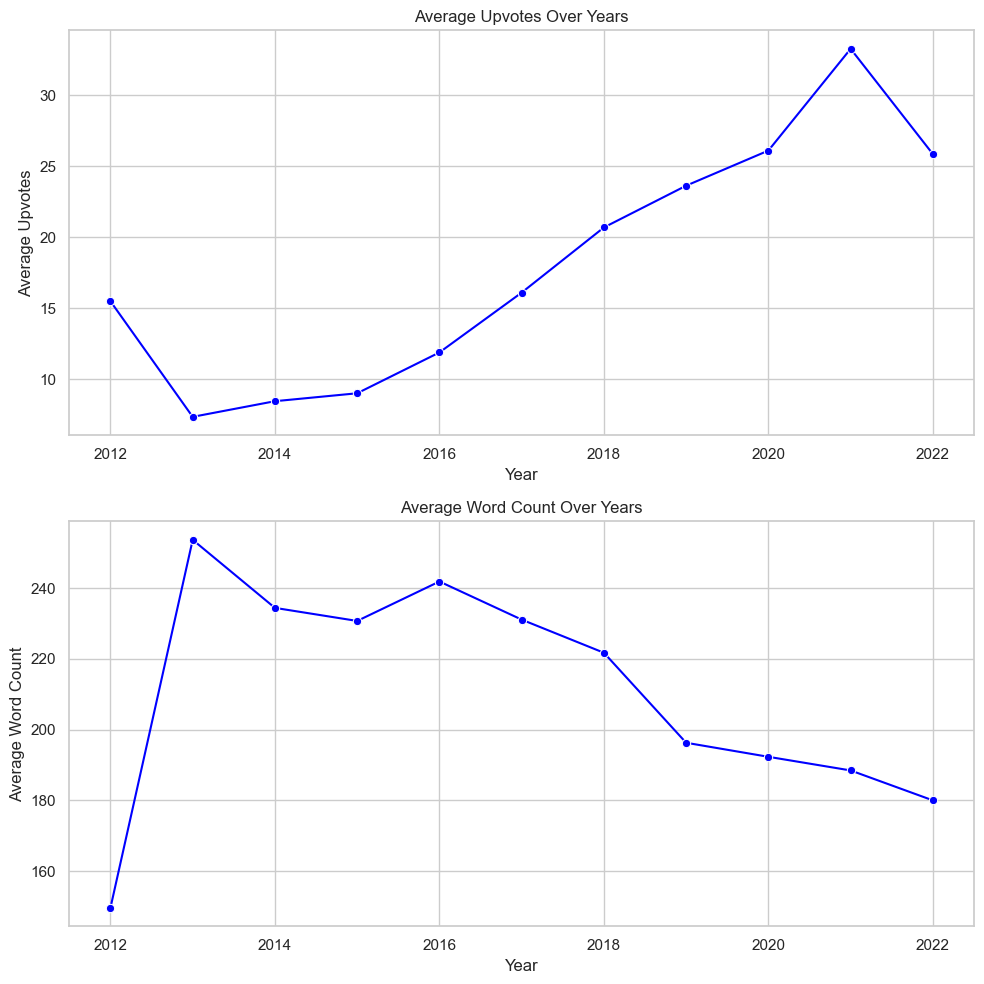

In [23]:
# Correctly creating the 'Year' column from 'Post_Date'
reddit_data['Year'] = reddit_data['Post_Date'].dt.year

# Regrouping the data by 'Year' and calculating averages
year_grouped = reddit_data.groupby('Year').agg({
    'Upvotes': 'mean',
    'WordCount': 'mean'
}).reset_index()

# Plotting trends over years
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plotting average upvotes over years
sns.lineplot(data=year_grouped, x='Year', y='Upvotes', ax=axes[0], marker='o', color='blue')
axes[0].set_title('Average Upvotes Over Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Upvotes')

# Plotting average word count over years
sns.lineplot(data=year_grouped, x='Year', y='WordCount', ax=axes[1], marker='o', color='blue')
axes[1].set_title('Average Word Count Over Years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Word Count')

plt.tight_layout()
plt.show()


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


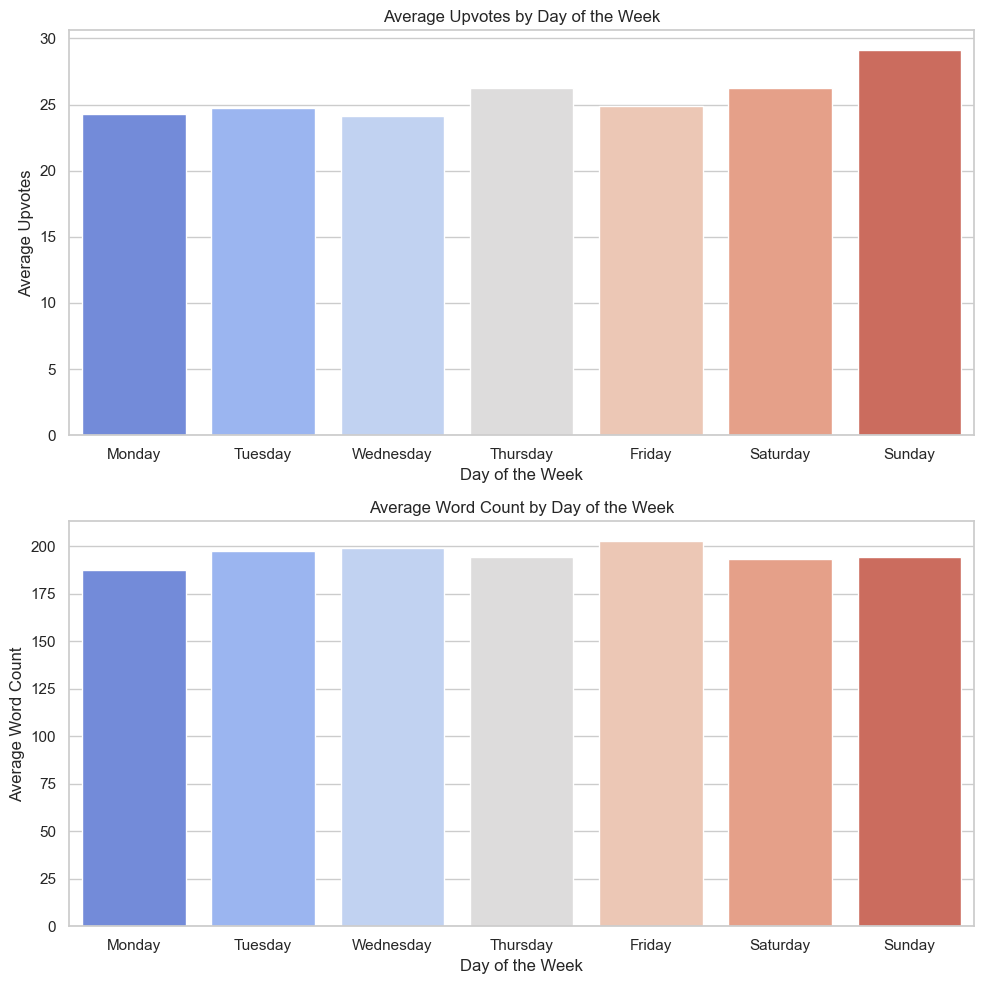

In [24]:
# Extracting the day of the week from 'Post_Date'
reddit_data['Day_of_Week'] = reddit_data['Post_Date'].dt.day_name()

# Grouping data by Day of the Week and calculating average upvotes and word count
day_of_week_grouped = reddit_data.groupby('Day_of_Week').agg({
    'Upvotes': 'mean',
    'WordCount': 'mean'
}).reset_index()

# Ordering days of the week for plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_grouped['Day_of_Week'] = pd.Categorical(day_of_week_grouped['Day_of_Week'], categories=days_order, ordered=True)
day_of_week_grouped.sort_values('Day_of_Week', inplace=True)

# Plotting trends based on Day of the Week
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plotting average upvotes by Day of the Week
sns.barplot(data=day_of_week_grouped, x='Day_of_Week', y='Upvotes', ax=axes[0], palette='coolwarm')
axes[0].set_title('Average Upvotes by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average Upvotes')

# Plotting average word count by Day of the Week
sns.barplot(data=day_of_week_grouped, x='Day_of_Week', y='WordCount', ax=axes[1], palette='coolwarm')
axes[1].set_title('Average Word Count by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Average Word Count')

plt.tight_layout()
plt.show()


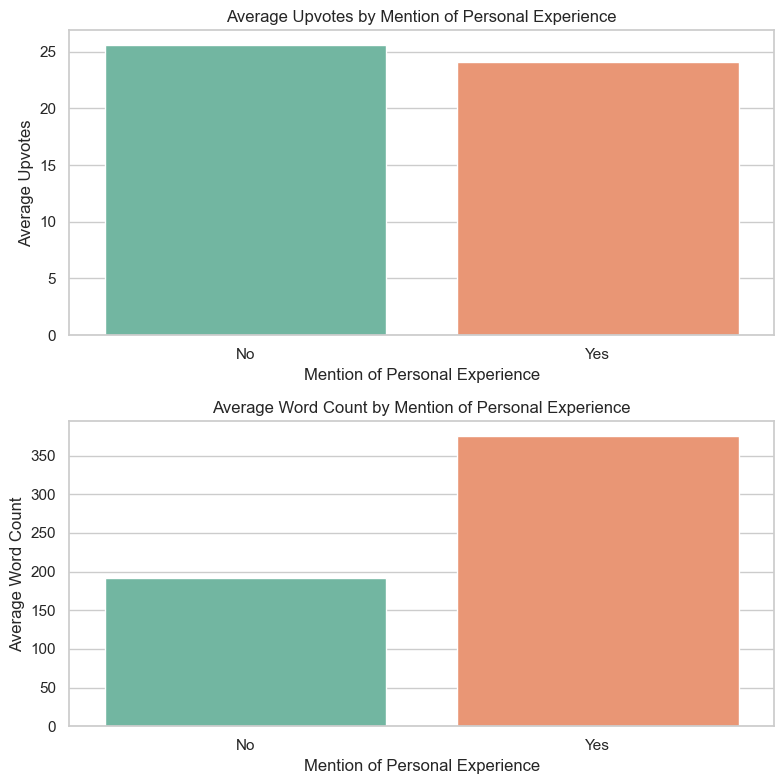

In [25]:
# Grouping data by Mention of Personal Experience and calculating average upvotes and word count
personal_experience_grouped = reddit_data.groupby('Mention of Personal Experience').agg({
    'Upvotes': 'mean',
    'WordCount': 'mean'
}).reset_index()

# Plotting trends based on Mention of Personal Experience
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Plotting average upvotes by Mention of Personal Experience
sns.barplot(data=personal_experience_grouped, x='Mention of Personal Experience', y='Upvotes', ax=axes[0], palette='Set2')
axes[0].set_title('Average Upvotes by Mention of Personal Experience')
axes[0].set_xlabel('Mention of Personal Experience')
axes[0].set_ylabel('Average Upvotes')

# Plotting average word count by Mention of Personal Experience
sns.barplot(data=personal_experience_grouped, x='Mention of Personal Experience', y='WordCount', ax=axes[1], palette='Set2')
axes[1].set_title('Average Word Count by Mention of Personal Experience')
axes[1].set_xlabel('Mention of Personal Experience')
axes[1].set_ylabel('Average Word Count')

plt.tight_layout()
plt.show()


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


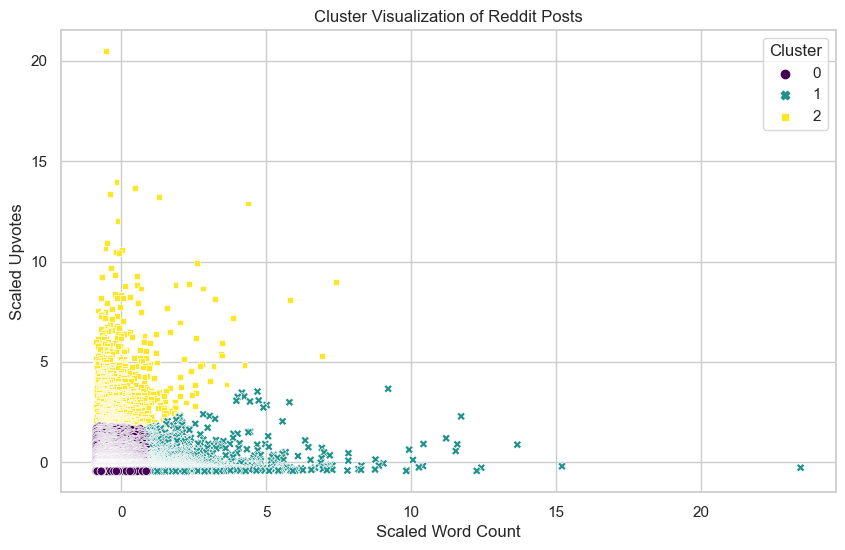

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(reddit_data[['Upvotes', 'WordCount']])

# Step 2: Applying K-Means clustering
# Choosing 3 clusters for initial analysis
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_

# Adding cluster labels to the dataset
reddit_data['Cluster'] = cluster_labels

# Step 3: Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 1], y=scaled_features[:, 0], hue=cluster_labels, palette='viridis', style=cluster_labels)
plt.title('Cluster Visualization of Reddit Posts')
plt.xlabel('Scaled Word Count')
plt.ylabel('Scaled Upvotes')
plt.legend(title='Cluster')
plt.show()


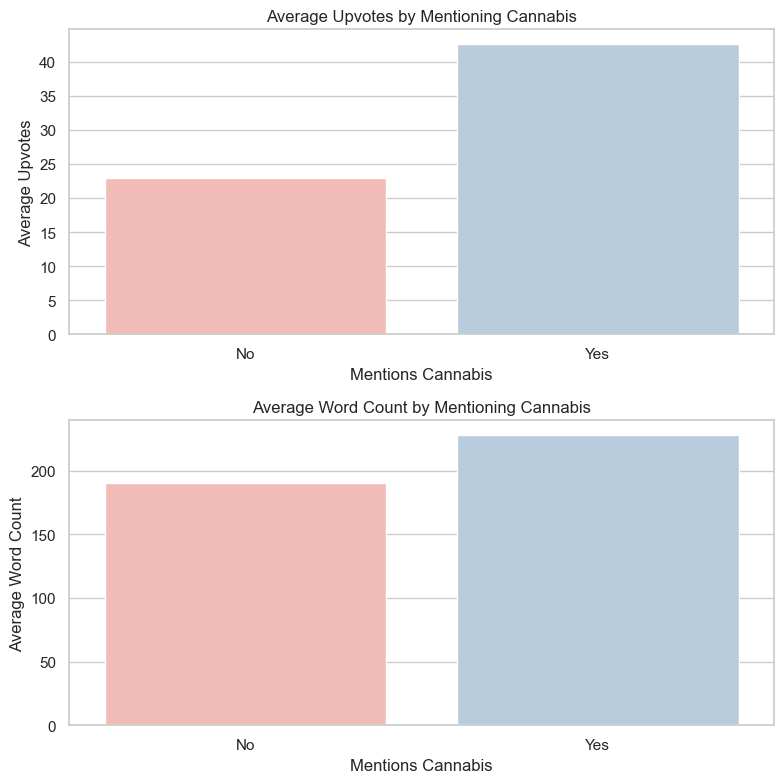

In [27]:
# Grouping data by 'Mentions Cannabis' and calculating average upvotes and word count
cannabis_mention_grouped = reddit_data.groupby('Mentions Cannabis').agg({
    'Upvotes': 'mean',
    'WordCount': 'mean'
}).reset_index()

# Plotting trends based on Mentioning Cannabis
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Plotting average upvotes by Mentioning Cannabis
sns.barplot(data=cannabis_mention_grouped, x='Mentions Cannabis', y='Upvotes', ax=axes[0], palette='Pastel1')
axes[0].set_title('Average Upvotes by Mentioning Cannabis')
axes[0].set_xlabel('Mentions Cannabis')
axes[0].set_ylabel('Average Upvotes')

# Plotting average word count by Mentioning Cannabis
sns.barplot(data=cannabis_mention_grouped, x='Mentions Cannabis', y='WordCount', ax=axes[1], palette='Pastel1')
axes[1].set_title('Average Word Count by Mentioning Cannabis')
axes[1].set_xlabel('Mentions Cannabis')
axes[1].set_ylabel('Average Word Count')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

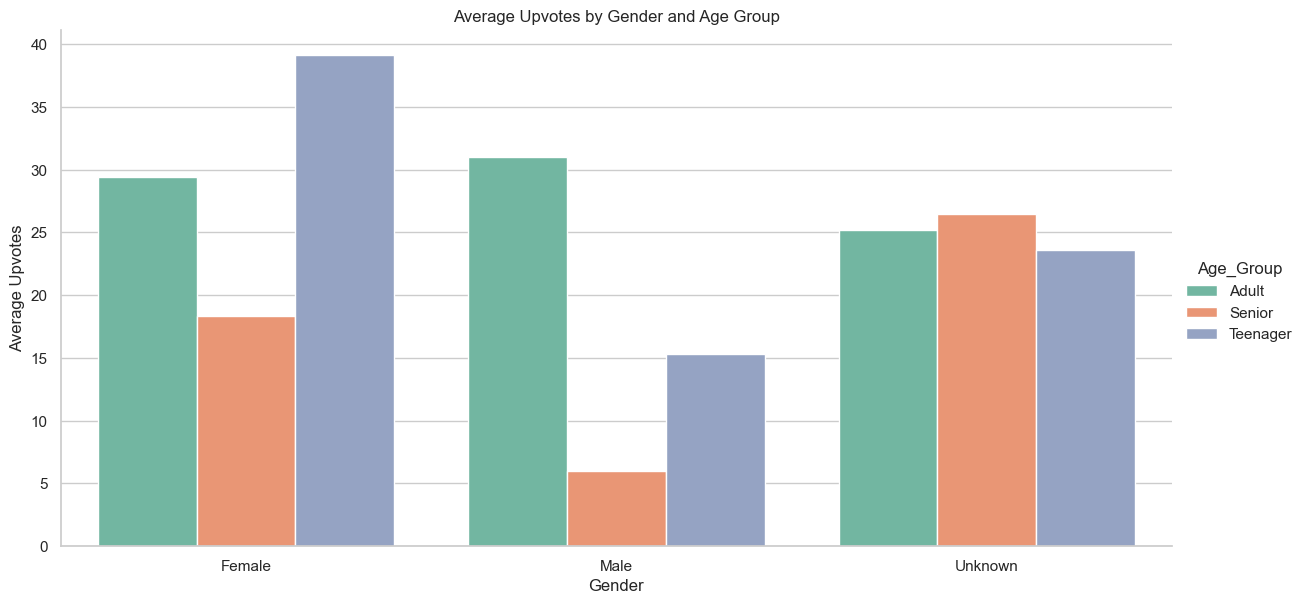

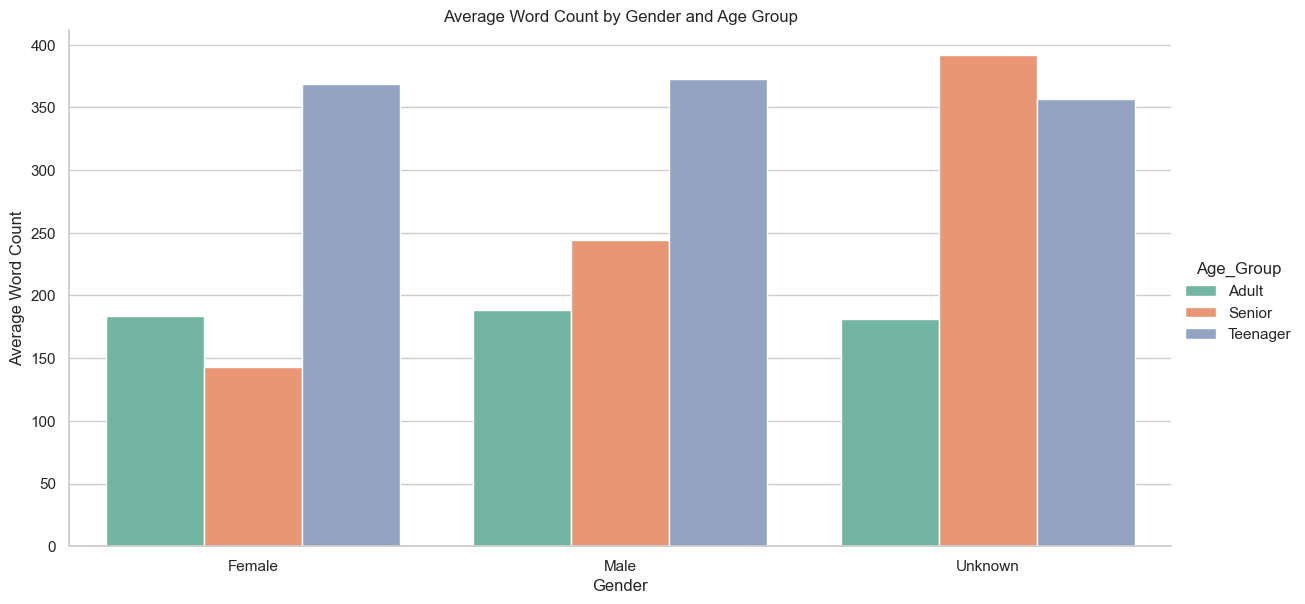

In [37]:
# Grouping data by 'Gender' and 'Age_Group' and calculating average upvotes and word count
gender_age_grouped = reddit_data.groupby(['Gender', 'Age_Group']).agg({
    'Upvotes': 'mean',
    'WordCount': 'mean'
}).reset_index()

# Plotting trends based on Gender and Age Group
plt.figure(figsize=(12, 6))
sns.catplot(x='Gender', y='Upvotes', hue='Age_Group', kind='bar', data=gender_age_grouped, palette='Set2', height=6, aspect=2)
plt.title('Average Upvotes by Gender and Age Group')
plt.ylabel('Average Upvotes')

sns.catplot(x='Gender', y='WordCount', hue='Age_Group', kind='bar', data=gender_age_grouped, palette='Set2', height=6, aspect=2)
plt.title('Average Word Count by Gender and Age Group')
plt.ylabel('Average Word Count')

plt.show()


In [33]:
reddit_data.columns

Index(['Username', 'Post_Date', 'PostTitle', 'PostTitle_Wordcount',
       'Mentions Cannabis', 'Use of Personal Pronouns',
       'Mention of Personal Experience',
       'Outcomes of cannabis consumption mentioned', 'Full_Post', 'PostURL',
       'Upvotes', 'WordCount', 'vader_scores', 'Vader_Score_Compound', 'Sad',
       'Joy', 'Anger', 'Surprise', 'Fear', 'Love',
       'Reason for Cannabis Consumption', 'Reason for Quitting Cannabis',
       'Outcomes of Quitting Cannabis', 'Frequency of Consumption',
       'Quitting Strategy', 'Plans on Quitting', 'Experience While Quitting',
       'Gender', 'Age_Group', 'Unnamed: 29', 'Unnamed: 30', 'Year', 'Month',
       'Day_of_Week', 'Cluster'],
      dtype='object')

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

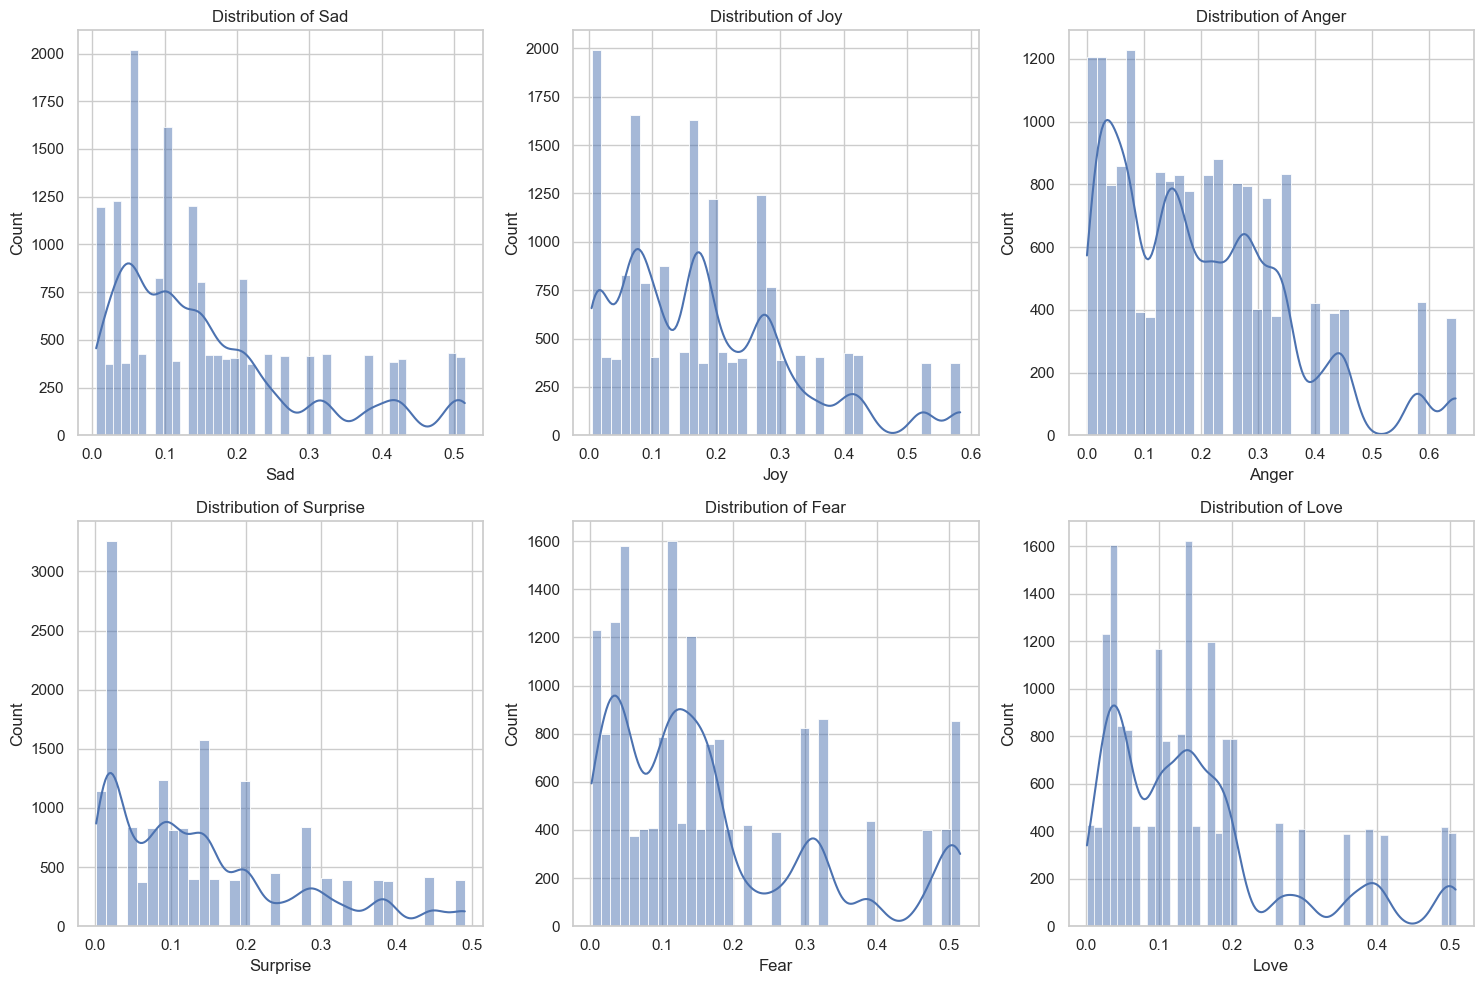

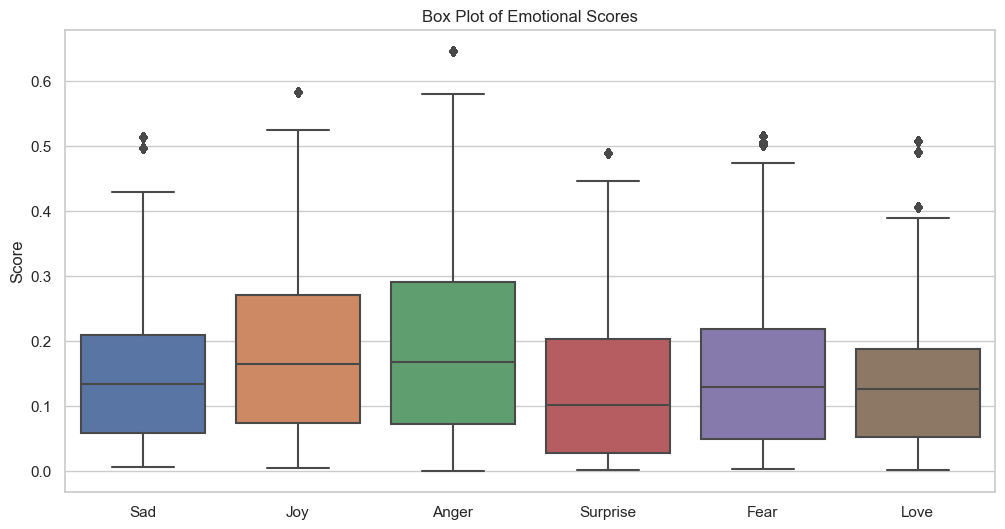

,Sad,Joy,Anger,Surprise,Fear,Love
count,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000
mean,0.160663,0.180384,0.199907,0.143459,0.166634,0.148953
std,0.132832,0.136702,0.154038,0.125779,0.145036,0.125138
min,0.005388,0.004344,0.000047,0.001037,0.002582,0.001334
25%,0.057758,0.074446,0.071719,0.027532,0.048353,0.052752
50%,0.134067,0.164357,0.167589,0.101257,0.129113,0.126261
75%,0.209155,0.270802,0.290794,0.203249,0.219086,0.188344
max,0.515050,0.583079,0.647225,0.490267,0.515702,0.507757


In [36]:
# Descriptive statistics for each emotion
emotion_stats = reddit_data[['Sad',
       'Joy', 'Anger', 'Surprise', 'Fear', 'Love']].describe()

# Plotting histograms for each emotion
plt.figure(figsize=(15, 10))
for i, emotion in enumerate(['Sad',
       'Joy', 'Anger', 'Surprise', 'Fear', 'Love']):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=reddit_data, x=emotion, kde=True)
    plt.title(f'Distribution of {emotion}')

plt.tight_layout()
plt.show()

# Plotting box plots for each emotion
plt.figure(figsize=(12, 6))
sns.boxplot(data=reddit_data[['Sad', 'Joy', 'Anger', 'Surprise', 'Fear', 'Love']])
plt.title('Box Plot of Emotional Scores')
plt.ylabel('Score')
plt.show()

emotion_stats
